In [3]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
import pandas as pd
import seaborn as sns
import mne_features
import warnings
warnings.filterwarnings('ignore')

adhd_len=[]
control_len=[]
path='./ADHD/'
for i in os.listdir(path):
    raw=mne.io.read_raw_fif(path+i,preload = True,verbose=False)
    adhd_len.append(raw._data.shape[1])
path='./Control/'
for i in os.listdir(path):
    raw=mne.io.read_raw_fif(path+i,preload = True,verbose=False)
    control_len.append(raw._data.shape[1])

In [4]:
adhd_tm_list=np.array(adhd_len)/128/60
control_tm_list=np.array(control_len)/128/60

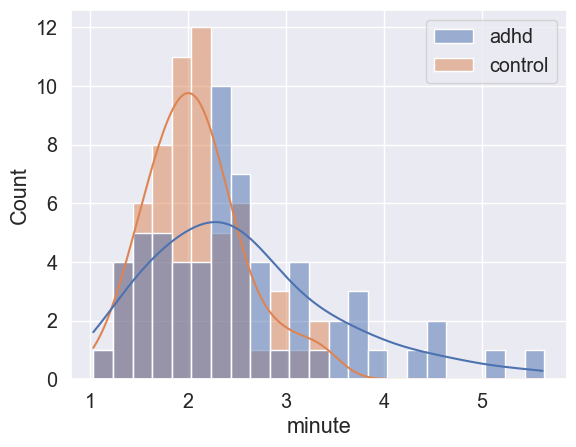

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(font_scale=1.3) 
tm_cnt=sns.histplot(data=pd.DataFrame([adhd_tm_list,control_tm_list],index=['adhd','control']).T, binwidth=0.2,kde=True)
tm_cnt.set(xticks=np.arange(1,6,1),xlabel='minute')
plt.show()

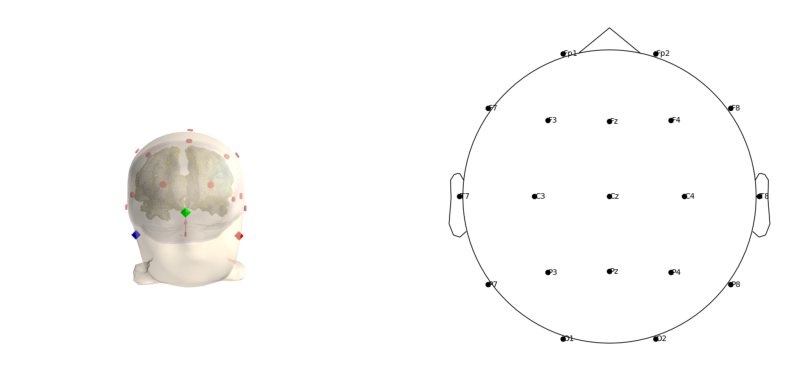

In [16]:
plt.figure(figsize=(10,5))
mri_img=plt.imread('./image/mri.png')
topomap_img=plt.imread('./image/channel_topomap.png')
plt.subplot(1,2,1)
plt.imshow(mri_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(topomap_img)
plt.axis('off')
plt.show()

In [196]:
ch_names=['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']

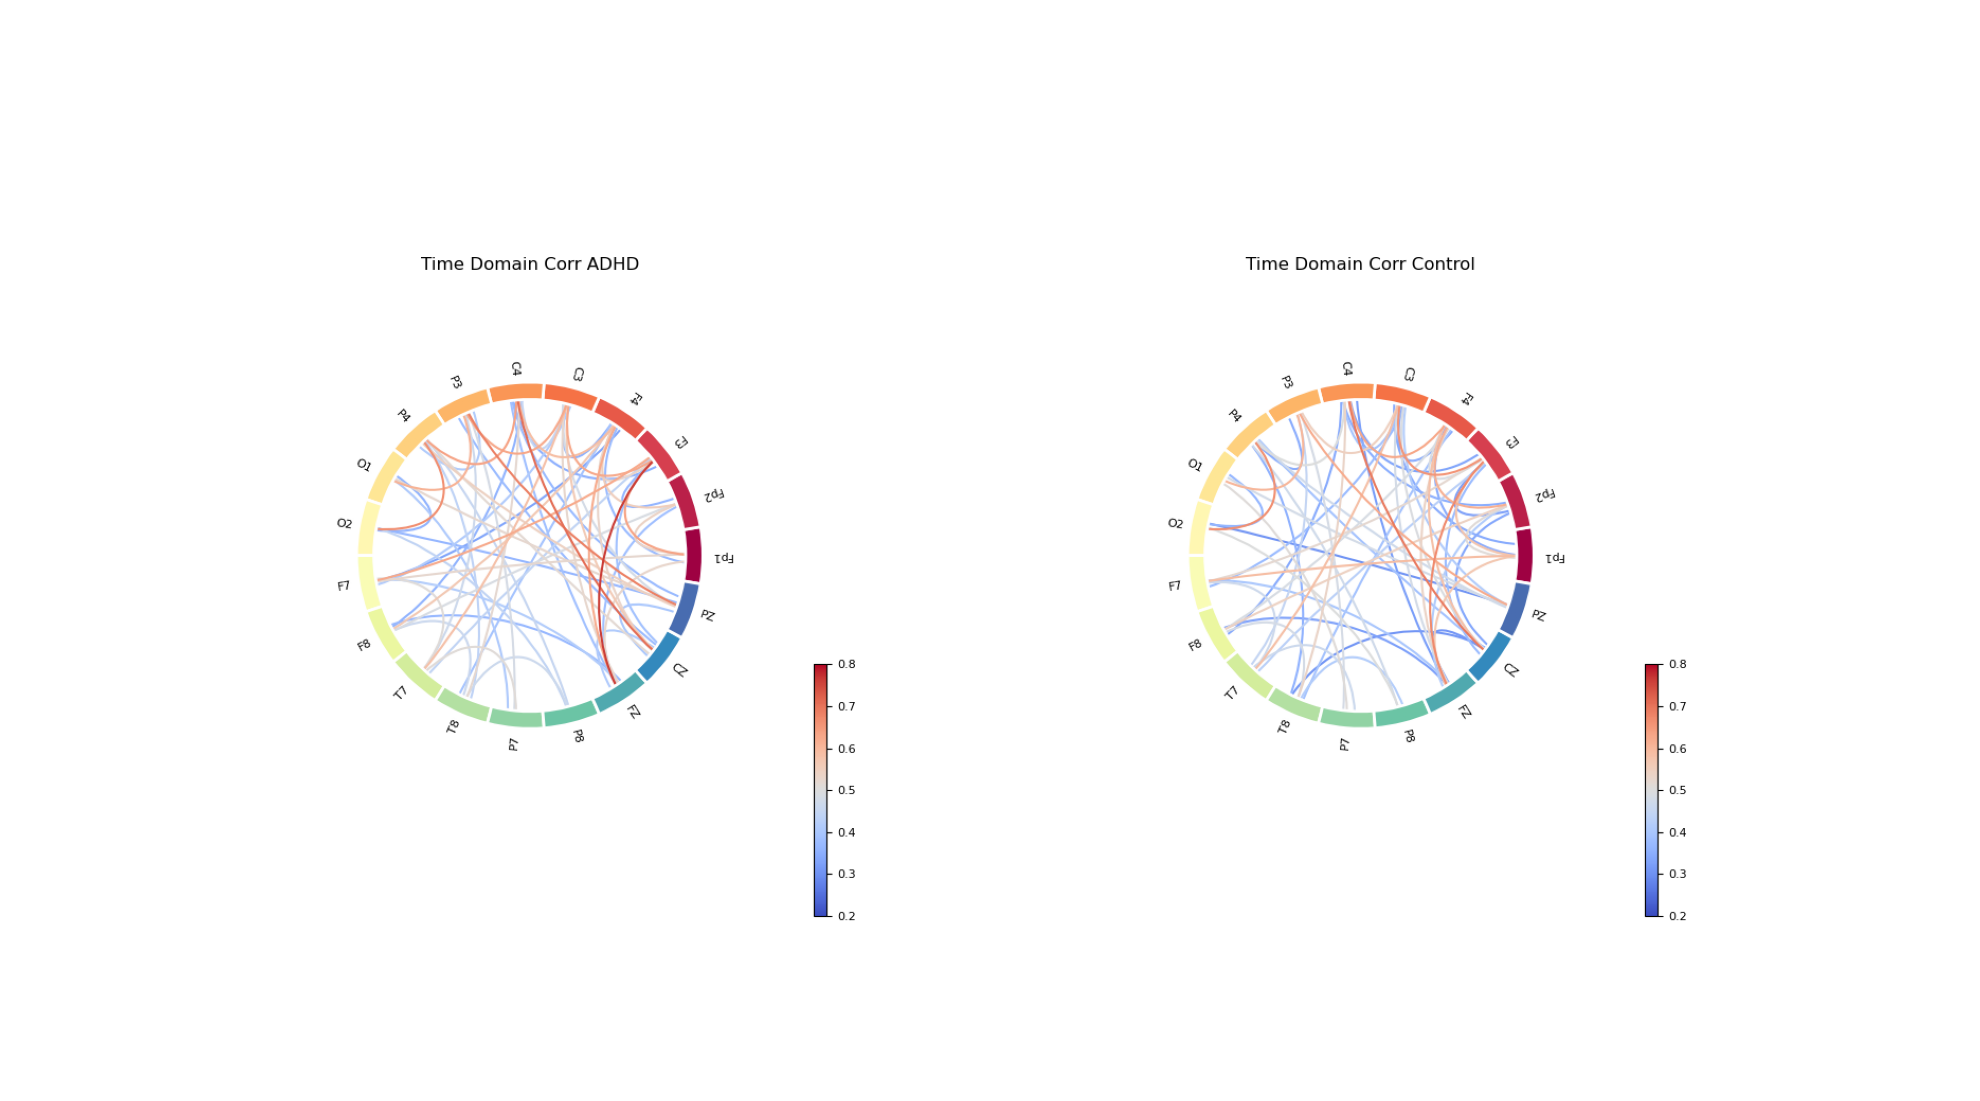

In [154]:
from mne.viz import plot_connectivity_circle
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
img=plt.imread('./image/time_corr.png')
plt.axis('off')
plt.imshow(img)


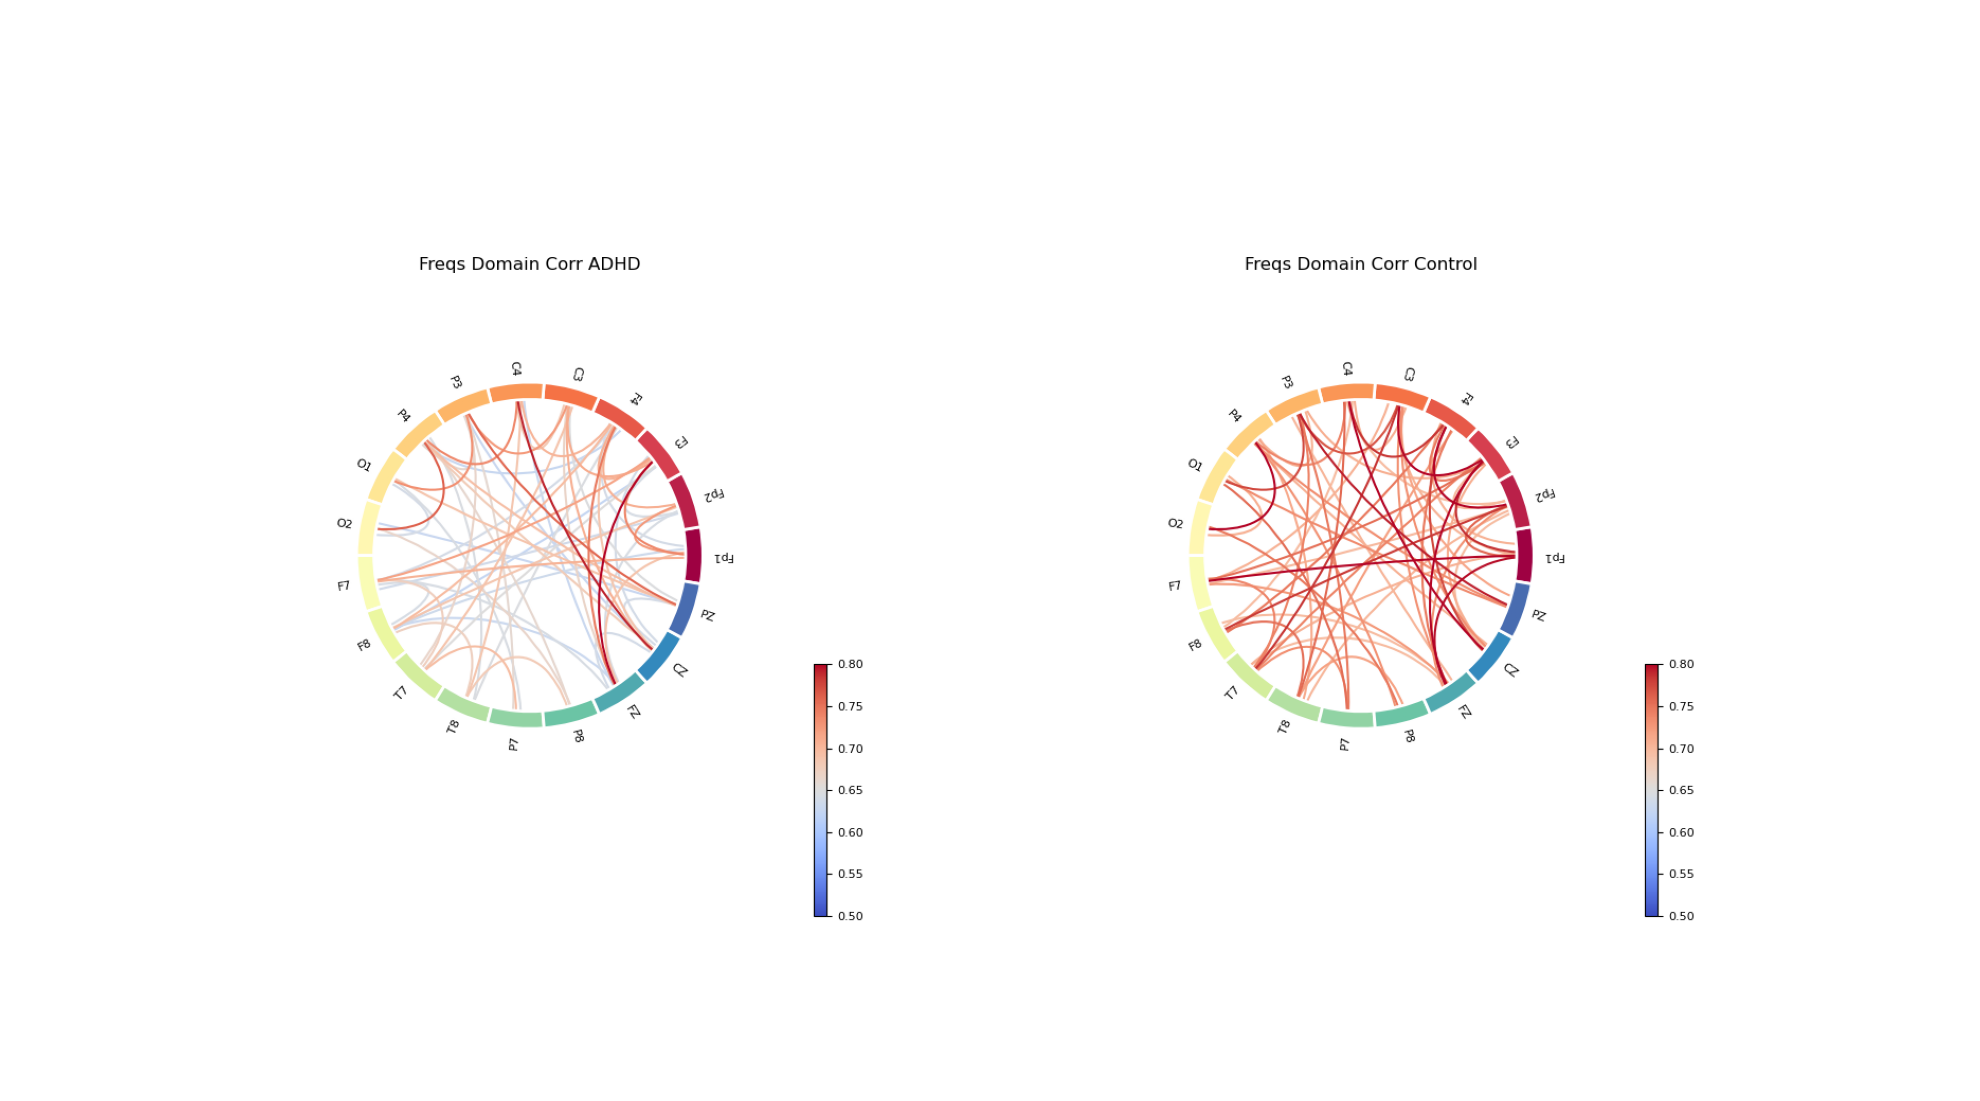

In [153]:
plt.figure(figsize=(40,20))
img=plt.imread('./image/freq_corr.png')
plt.axis('off')
plt.imshow(img)

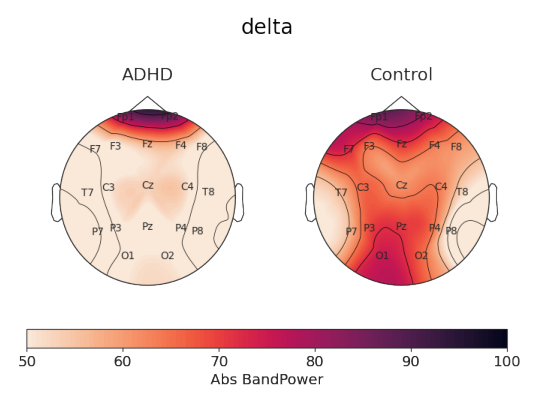

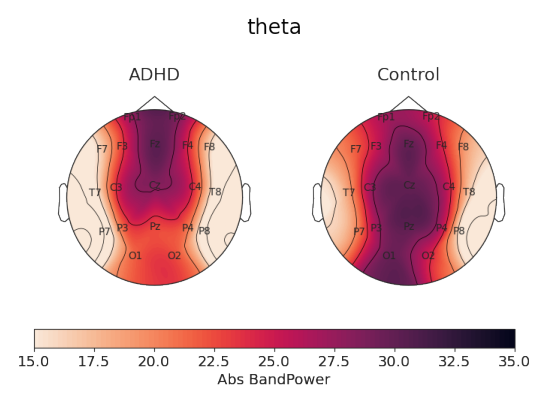

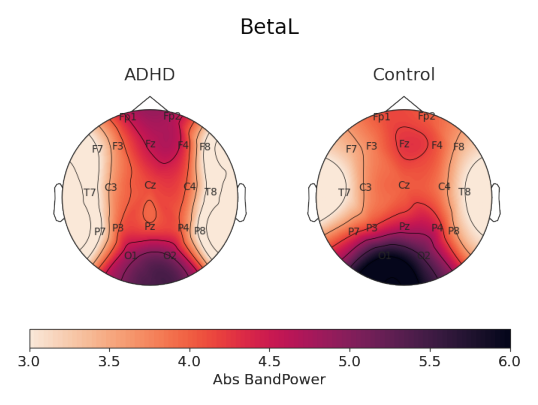

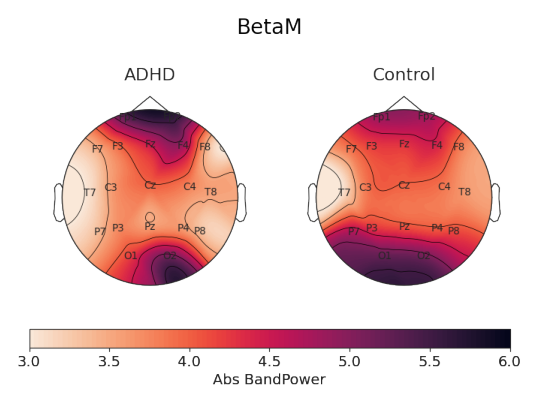

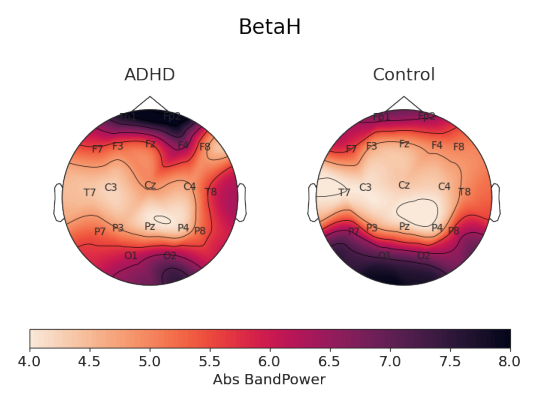

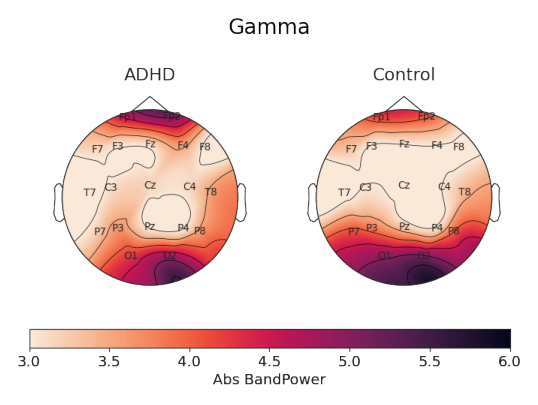

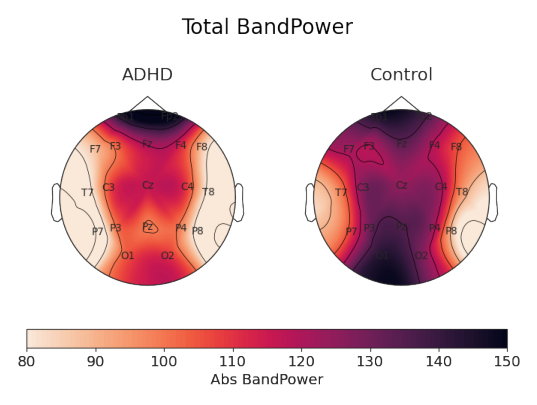

In [14]:
import pandas as pd
import yasa

for i in ['delta','theta','betaL','betaM','betaH','gamma','total']:
    plt.figure(figsize=(10,5))
    img=plt.imread(f'./image/{i}.png')
    plt.axis('off')
    plt.imshow(img)
    plt.show()